### Plots for ISWAT SIRs


CH#1: 2015 Feb 10

CH#2: 2015 Aug 17

CH#3: 2015 Aug 19

CH#4: 2018 May 30


In [8]:
import numpy as np
import scipy.io
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import  DateFormatter
from datetime import timedelta
import seaborn as sns
import datetime
import astropy
import astropy.constants as constb
from sunpy.time import parse_time
import time
import pickle
import sys
import os
import urllib
import json
import importlib
import pandas as pd
import copy
import openpyxl
import h5py
import heliopy.data.spice as spicedata
import heliopy.spice as spice
import heliosat

#because script is not in root directory of package
#sys.path.append('/Users/chris/python/heliocats')
sys.path.append('/home/cmoestl/pycode/heliocats')
import heliocats.data as hd


from heliocats import plot as hp
importlib.reload(hp) #reload again while debugging

from config import data_path

from astropy.constants import au
#define AU in km
AU=au.value/1e3

## load in situ data and positions

In [16]:
load_data=1

if load_data > 0:
           
    print('load MAVEN data MSO') 
    #filemav='maven_2014_2018.p'
    #[mav,hmav]=pickle.load(open(filemav, 'rb' ) )
    filemav='maven_2014_2018_removed.p'
    [mavr,hmavr]=pickle.load(open(data_path+filemav, 'rb' ) )    
    #removed magnetosphere by C. Simon Wedlund, 1 data point per orbit, MSO
    filemav='maven_2014_2018_removed_smoothed.p'
    [mav,hmav]=pickle.load(open(data_path+filemav, 'rb' ) )
    
        
    #use hd.save_msl_rad() first to convert data doseE_sol_filter_2019.dat to pickle file
    print('load MSL RAD')
    #MSL RAD
    rad=hd.load_msl_rad()#, rad.time,rad.dose_sol
        
    
    print('load and merge STEREO-A data SCEQ') #yearly magplasma files from stereo science center, conversion to SCEQ 
    filesta1='stereoa_2007_2019_sceq.p'
    [sta1,hsta1]=pickle.load(open(data_path+filesta1, "rb" ) )  
    sta1=sta1[np.where(sta1.time < parse_time('2019-Sep-01 00:00').datetime)[0]]

    #beacon data
    #filesta2="stereoa_2019_2020_sceq_beacon.p"
    filesta2='stereoa_2019_2020_sept_sceq_beacon.p'
    [sta2,hsta2]=pickle.load(open(data_path+filesta2, "rb" ) )  
    sta2=sta2[np.where(sta2.time >= parse_time('2019-Sep-01 00:00').datetime)[0]]

    #make array
    sta=np.zeros(np.size(sta1.time)+np.size(sta2.time),dtype=[('time',object),('bx', float),('by', float),\
                ('bz', float),('bt', float),('vt', float),('np', float),('tp', float),\
                ('x', float),('y', float),('z', float),\
                ('r', float),('lat', float),('lon', float)])   

    #convert to recarray
    sta = sta.view(np.recarray)  
    sta.time=np.hstack((sta1.time,sta2.time))
    sta.bx=np.hstack((sta1.bx,sta2.bx))
    sta.by=np.hstack((sta1.by,sta2.by))
    sta.bz=np.hstack((sta1.bz,sta2.bz))
    sta.bt=np.hstack((sta1.bt,sta2.bt))
    sta.vt=np.hstack((sta1.vt,sta2.vt))
    sta.np=np.hstack((sta1.np,sta2.np))
    sta.tp=np.hstack((sta1.tp,sta2.tp))
    sta.x=np.hstack((sta1.x,sta2.x))
    sta.y=np.hstack((sta1.y,sta2.y))
    sta.z=np.hstack((sta1.z,sta2.z))
    sta.r=np.hstack((sta1.r,sta2.r))
    sta.lon=np.hstack((sta1.lon,sta2.lon))
    sta.lat=np.hstack((sta1.lat,sta2.lat))
    print('STA Merging done')

    
    
    print('load and merge Wind data HEEQ') 
    #from HELCATS HEEQ until 2018 1 1 + new self-processed data with heliosat and hd.save_wind_data
    filewin="wind_2007_2018_heeq_helcats.p" 
    [win1,hwin1]=pickle.load(open(data_path+filewin, "rb" ) )  
    
    #or use: filewin2="wind_2018_now_heeq.p" 
    #filewin2="wind_2018_2019_heeq.p" 
    filewin2="wind_2018_2020_oct_heeq.p" 
    [win2,hwin2]=pickle.load(open(data_path+filewin2, "rb" ) )  

    #merge Wind old and new data 
    #cut off HELCATS data at end of 2017, win2 begins exactly after this
    win1=win1[np.where(win1.time < parse_time('2018-Jan-01 00:00').datetime)[0]]
    #make array
    win=np.zeros(np.size(win1.time)+np.size(win2.time),dtype=[('time',object),('bx', float),('by', float),\
                ('bz', float),('bt', float),('vt', float),('np', float),('tp', float),\
                ('x', float),('y', float),('z', float),\
                ('r', float),('lat', float),('lon', float)])   

    #convert to recarray
    win = win.view(np.recarray)  
    win.time=np.hstack((win1.time,win2.time))
    win.bx=np.hstack((win1.bx,win2.bx))
    win.by=np.hstack((win1.by,win2.by))
    win.bz=np.hstack((win1.bz,win2.bz))
    win.bt=np.hstack((win1.bt,win2.bt))
    win.vt=np.hstack((win1.vt,win2.vt))
    win.np=np.hstack((win1.np,win2.np))
    win.tp=np.hstack((win1.tp,win2.tp))
    win.x=np.hstack((win1.x,win2.x))
    win.y=np.hstack((win1.y,win2.y))
    win.z=np.hstack((win1.z,win2.z))
    win.r=np.hstack((win1.r,win2.r))
    win.lon=np.hstack((win1.lon,win2.lon))
    win.lat=np.hstack((win1.lat,win2.lat))

    print('Wind merging done')
    

#[psp, bepi, solo, sta, earth, venus, mars, mercury,frame]= \
#      pickle.load( open( '../data/positions_psp_solo_bepi_sta_planets_HEEQ_1hour.p', "rb" ))

print('done')

load MAVEN data MSO
load MSL RAD
load and merge STEREO-A data SCEQ
STA Merging done
load and merge Wind data HEEQ
Wind merging done
done


## Results

saved as  ../results/iswat/Wind_2015_Feb_05_2015_Feb_20.png
saved as  ../results/iswat/STEREO-A_2015_Feb_05_2015_Feb_20.png
saved as  ../results/iswat/Wind_2015_Aug_10_2015_Sep_01.png
saved as  ../results/iswat/STEREO-A_2015_Aug_10_2015_Sep_01.png
saved as  ../results/iswat/Wind_2018_May_20_2018_Jun_15.png
saved as  ../results/iswat/STEREO-A_2018_May_20_2018_Jun_15.png


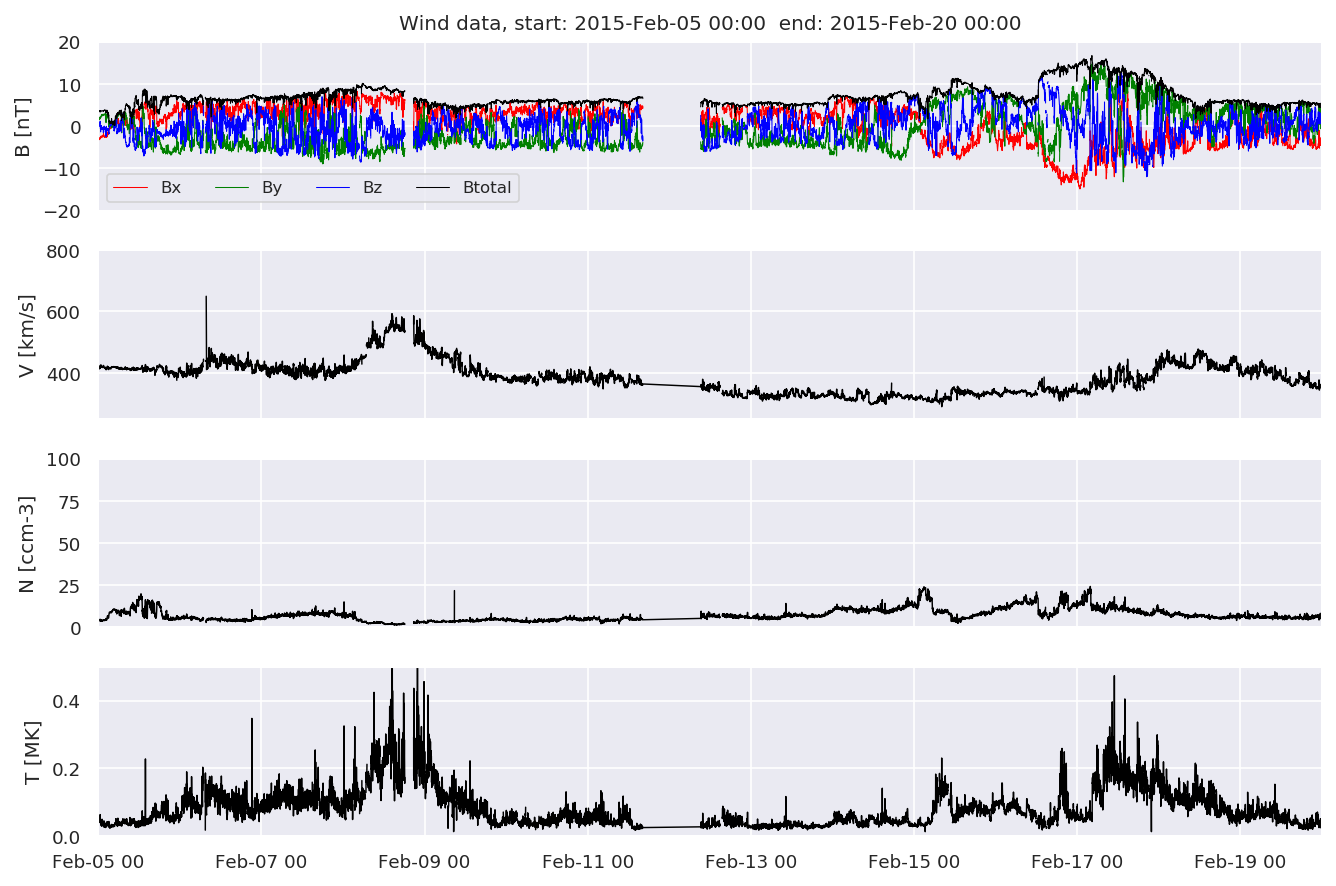

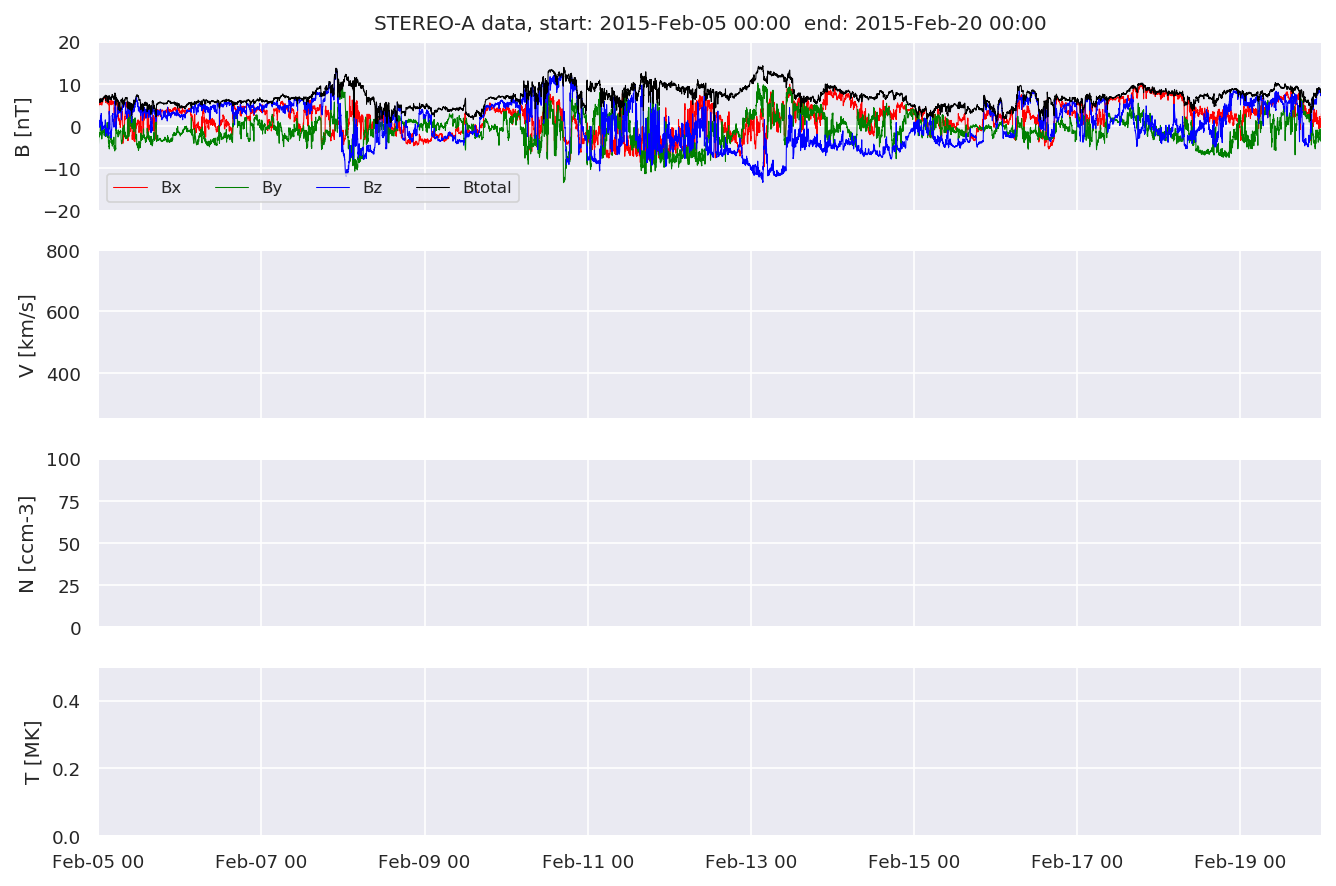

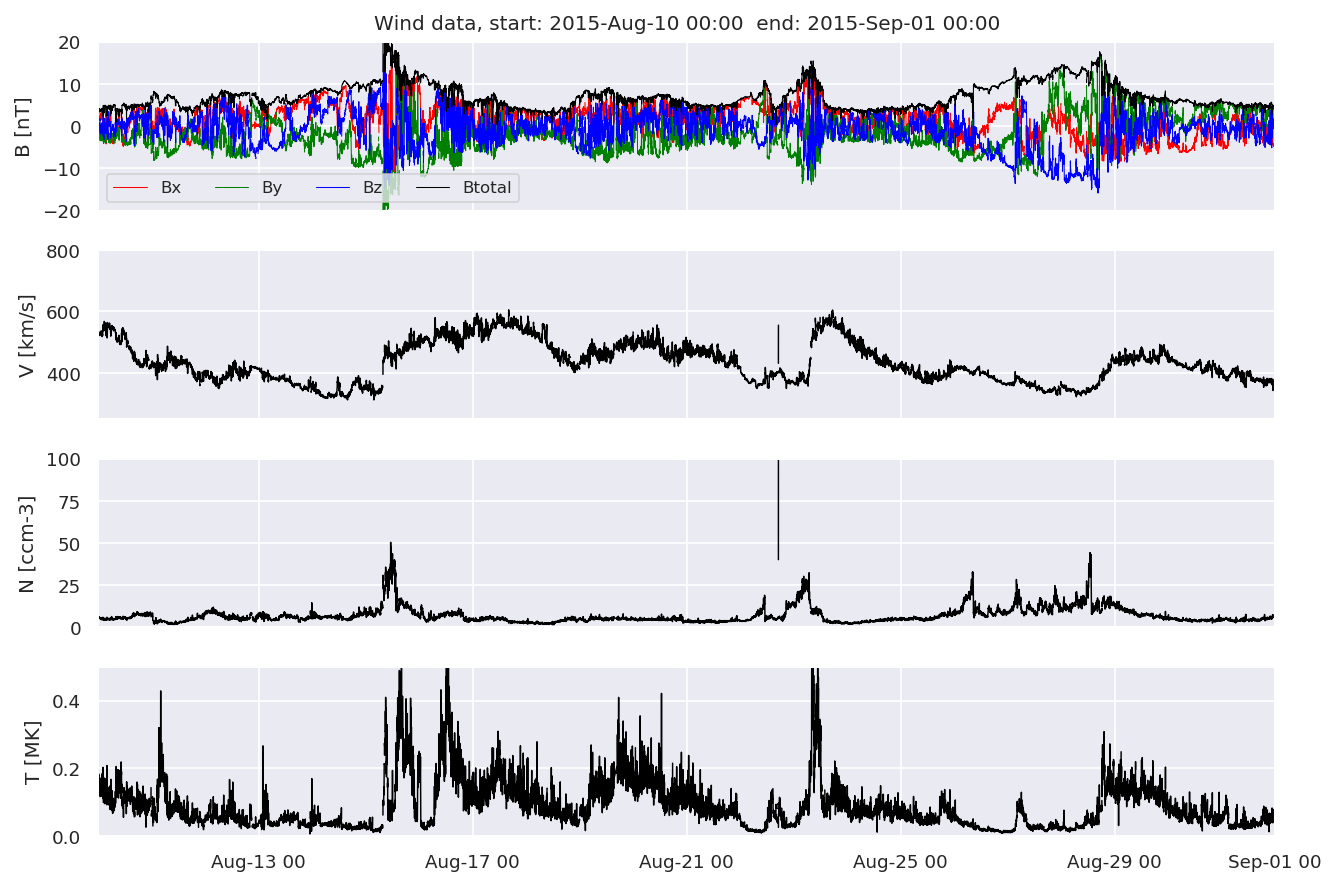

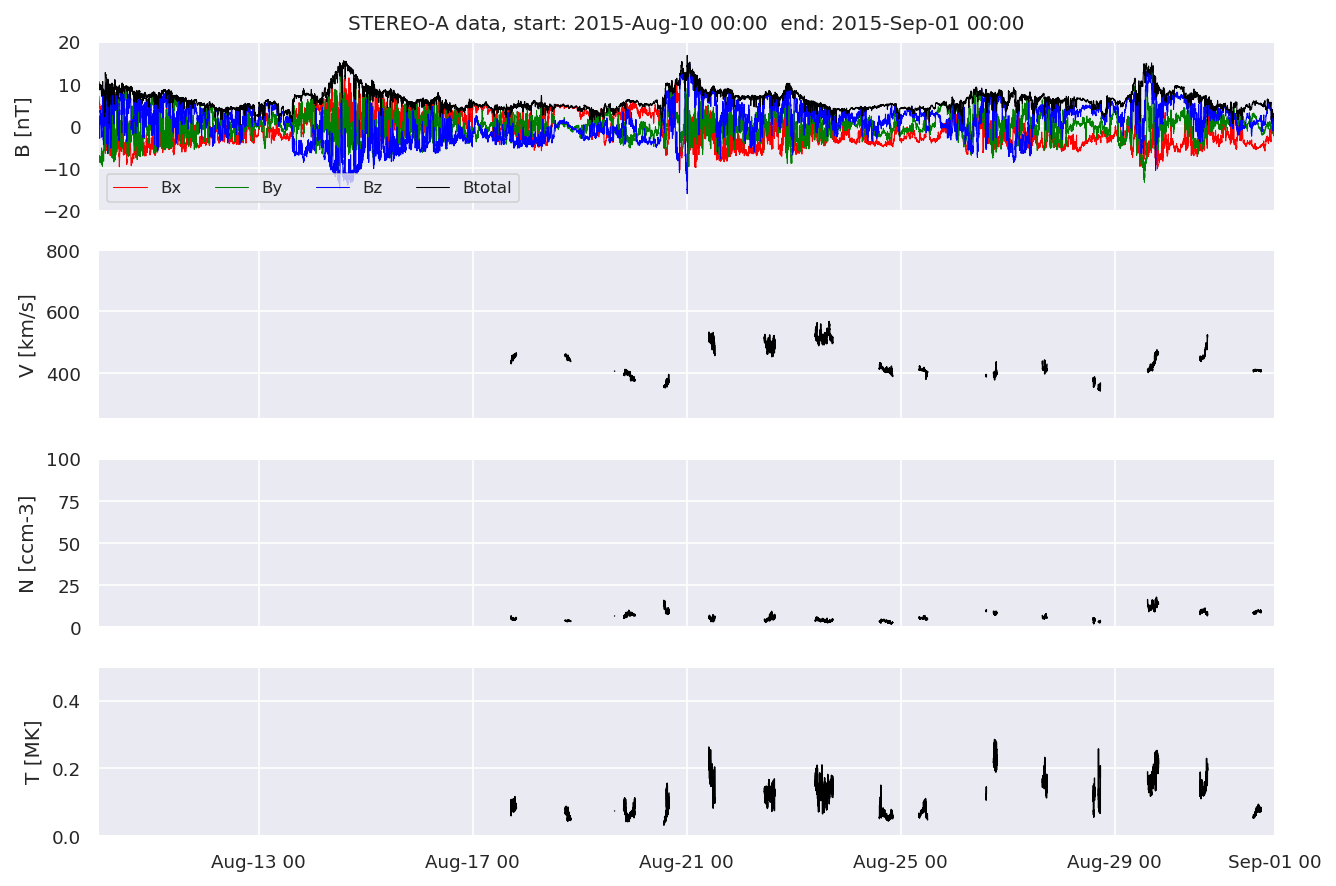

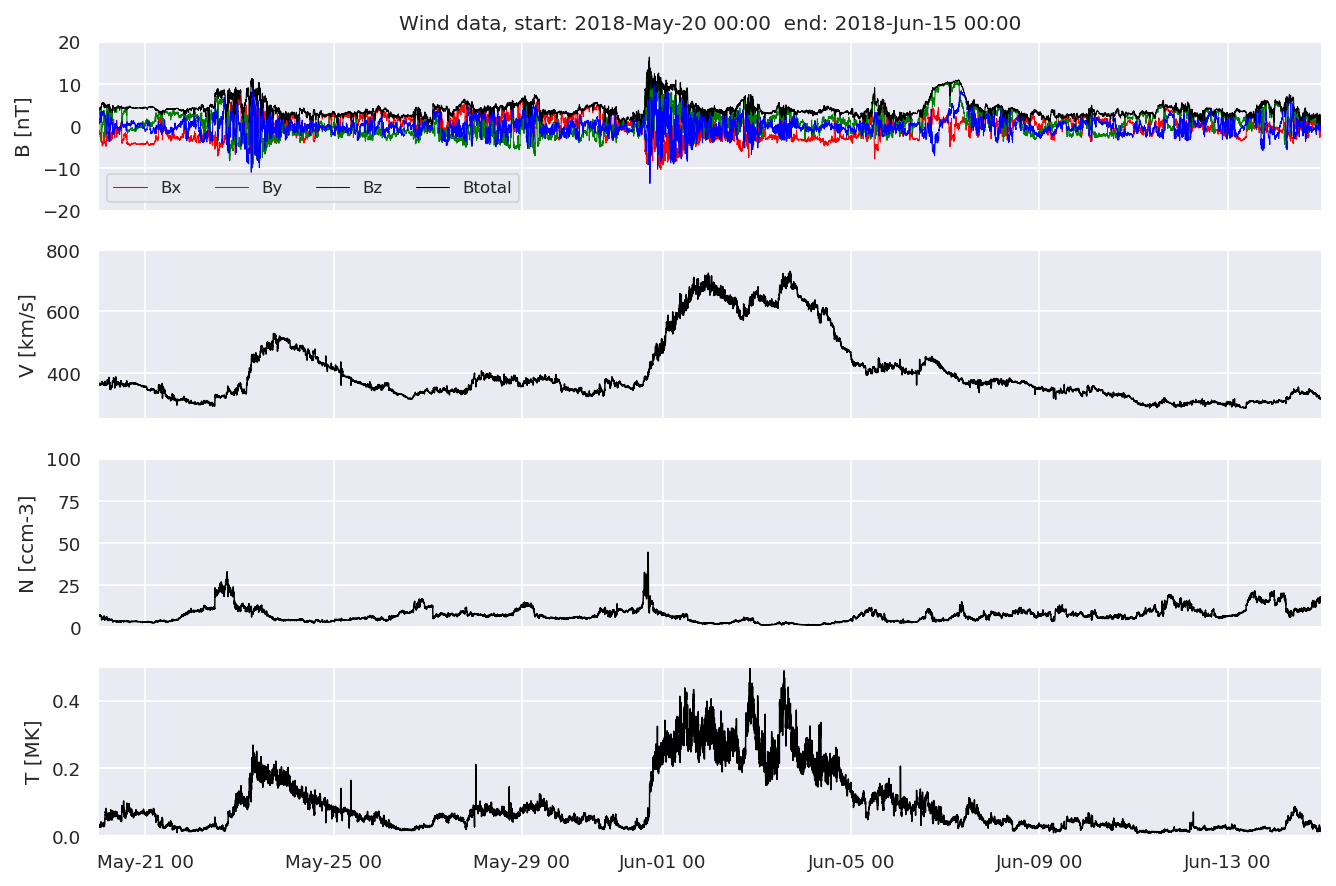

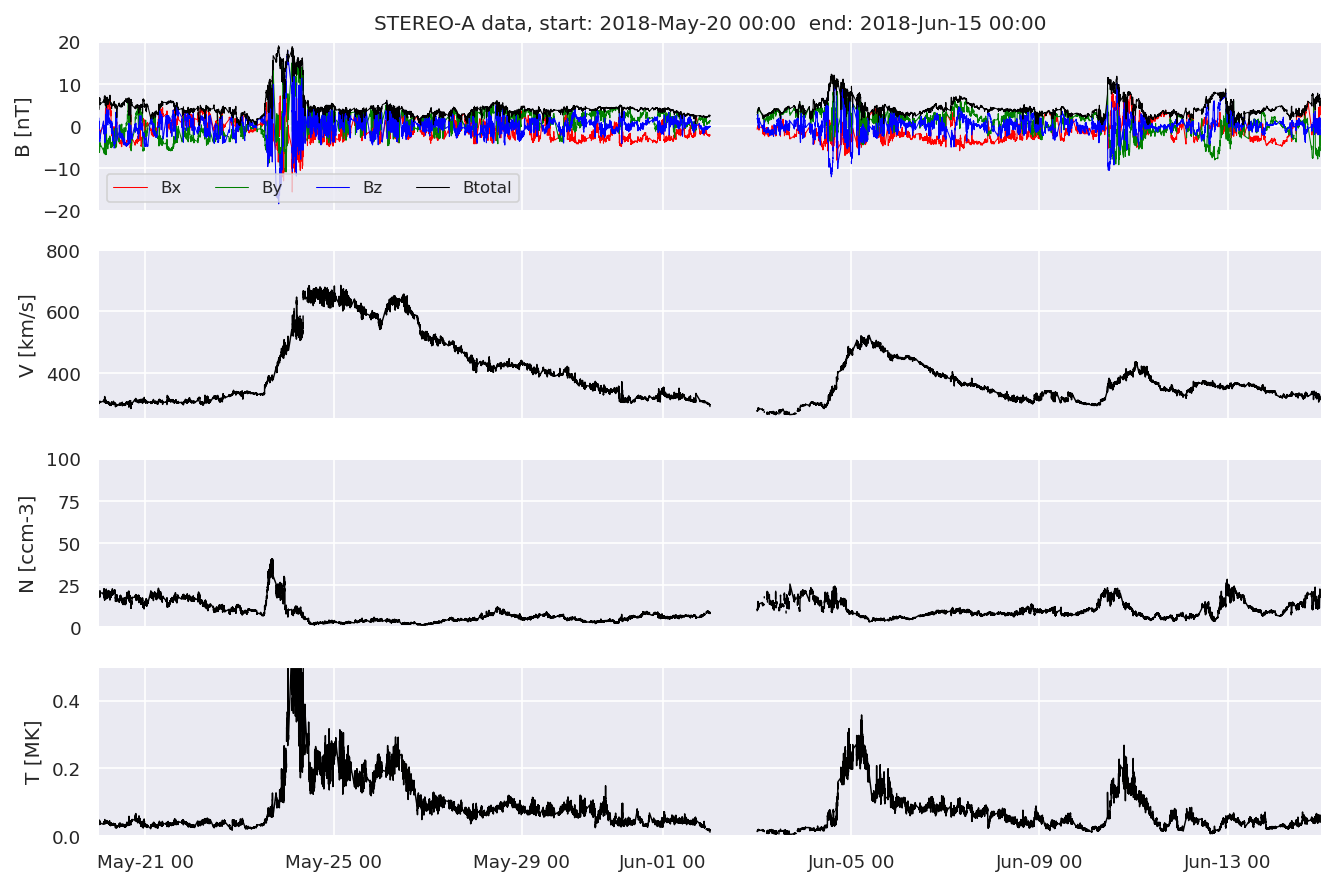

In [18]:
start='2015-02-05'
end='2015-02-20'


hp.plot_insitu(win, start, end, 'Wind', '../results/iswat/')
hp.plot_insitu(sta, start, end, 'STEREO-A', '../results/iswat/')


start='2015-08-10'
end='2015-09-01'
hp.plot_insitu(win, start, end, 'Wind', '../results/iswat/')
hp.plot_insitu(sta, start, end, 'STEREO-A', '../results/iswat/')


start='2018-05-20'
end='2018-06-15'
hp.plot_insitu(win, start, end, 'Wind', '../results/iswat/')
hp.plot_insitu(sta, start, end, 'STEREO-A', '../results/iswat/')





